In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/zomato.csv')

Mounted at /content/drive


# New Section

In [ ]:
data.head()

,online_order,book_table,rate,dish_liked,approx_cost_for_one_people,menu_item,cuisines_word_embedding_PC1,cuisines_word_embedding_PC2,cuisines_word_embedding_PC3,cuisines_word_embedding_PC4,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,1,1,4.1,7,400.0,0,1.372654,-1.112331,0.075874,0.306016,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,7,400.0,0,3.158016,-0.282180,0.549734,-0.322153,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,7,400.0,0,0.368333,1.603899,-0.567267,-1.794122,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,1,150.0,0,-1.179024,-0.740344,-1.917100,0.348110,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,2,300.0,0,-0.850827,-2.705486,0.586016,-0.420224,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Separate features and target variable
y = data['rate']
X = data.drop(columns=['rate'])


# Standardize numerical features for better performance in regression models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# Calculate mutual information to determine the importance of features for the target variable 'rate'
mi_scores = mutual_info_regression(X_scaled, y)

# Store mutual information scores in a DataFrame to identify the most important features
mi_scores_df = pd.DataFrame({
    'Feature': X.select_dtypes(include=[np.number]).columns,
    'Mutual Information Score': mi_scores
}).sort_values(by='Mutual Information Score', ascending=False)

# Display the top features by mutual information score
print(mi_scores_df.head(20))  # Shows the top 20 features

                         Feature  Mutual Information Score
9    cuisines_word_embedding_PC5                  0.805848
6    cuisines_word_embedding_PC2                  0.804911
8    cuisines_word_embedding_PC4                  0.804725
5    cuisines_word_embedding_PC1                  0.803345
12   cuisines_word_embedding_PC8                  0.801743
14  cuisines_word_embedding_PC10                  0.801535
11   cuisines_word_embedding_PC7                  0.801361
10   cuisines_word_embedding_PC6                  0.799566
13   cuisines_word_embedding_PC9                  0.799491
7    cuisines_word_embedding_PC3                  0.795650
2                     dish_liked                  0.226718
3     approx_cost_for_one_people                  0.193544
1                     book_table                  0.112249
42                   Quick Bites                  0.053171
22                multiple_types                  0.031095
24                           Bar                  0.0245

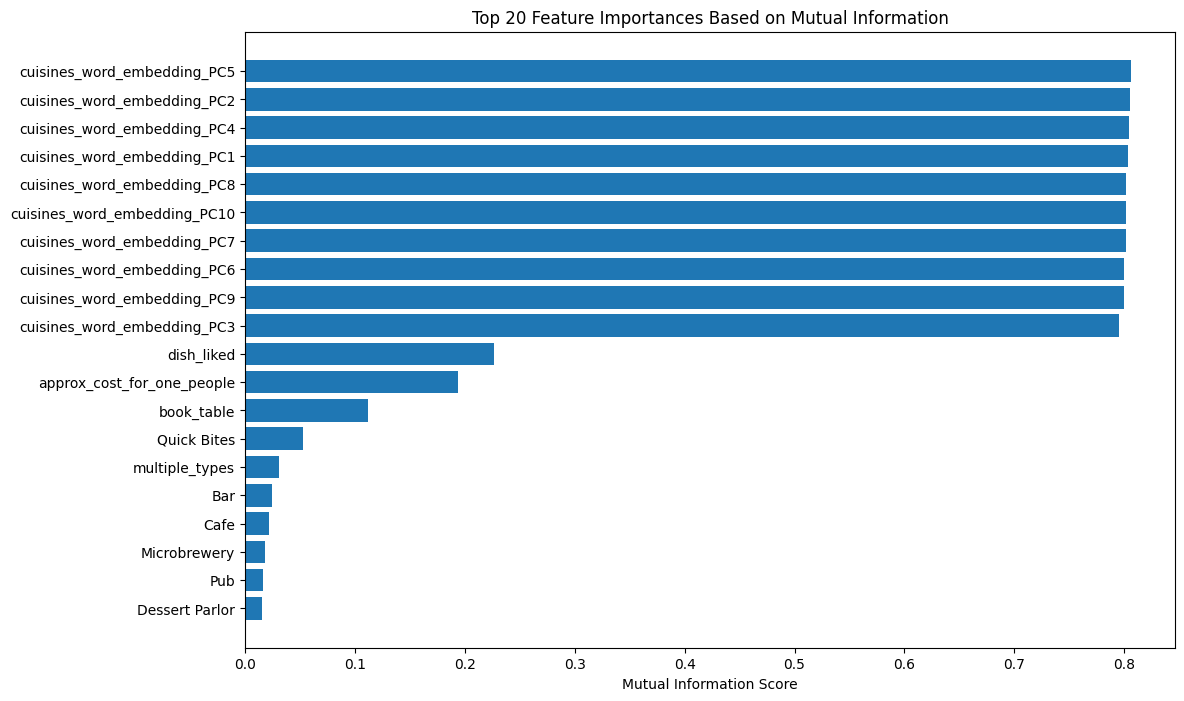

In [ ]:

# Plot the mutual information scores to visualize feature importance
plt.figure(figsize=(12, 8))
plt.barh(mi_scores_df['Feature'][:20], mi_scores_df['Mutual Information Score'][:20])
plt.xlabel('Mutual Information Score')
plt.title('Top 20 Feature Importances Based on Mutual Information')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Separate features and target variable
X = data.drop(columns=['rate'])
y = data['rate']

# Standardize numerical features for better performance in Lasso regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# Apply Lasso with cross-validation to automatically select the best alpha value
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Extract features selected by Lasso (non-zero coefficients)
selected_features = X.select_dtypes(include=[np.number]).columns[lasso.coef_ != 0]
selected_features_list = list(selected_features)

# Print the selected features
print("Selected features by Lasso:")
print(selected_features_list)


NameError: name 'LassoCV' is not defined

# model creation

# 1. standatized lasso selected features


In [ ]:

# Separate features and target variable
X = data.drop(columns=['rate'])
y = data['rate']

# Standardize numerical features for better performance in regression models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# Applying Lasso to select features
lasso_selected_features_list = [
    'online_order', 'book_table', 'dish_liked', 'approx_cost_for_one_people',
    'menu_item', 'cuisines_word_embedding_PC1', 'cuisines_word_embedding_PC2',
    'cuisines_word_embedding_PC3', 'cuisines_word_embedding_PC4',
    'cuisines_word_embedding_PC5', 'cuisines_word_embedding_PC6',
    'cuisines_word_embedding_PC7', 'cuisines_word_embedding_PC8',
    'cuisines_word_embedding_PC9', 'cuisines_word_embedding_PC10', 'Buffet',
    'Cafes', 'Desserts', 'Dine-out', 'Pubs and bars', 'multiple_types',
    'Bakery', 'Bar', 'Beverage Shop', 'Cafe', 'Casual Dining', 'Club',
    'Dessert Parlor', 'Dhaba', 'Fine Dining', 'Food Court', 'Food Truck',
    'Irani Cafee', 'Kiosk', 'Lounge', 'Meat Shop', 'Mess', 'Microbrewery',
    'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway', 'BTM', 'Banashankari',
    'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Brookefield',
    'Church Street', 'Electronic City', 'HSR', 'Indiranagar', 'JP Nagar',
    'Jayanagar', 'Kalyan Nagar', 'Kammanahalli', 'Koramangala 4th Block',
    'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block',
    'Lavelle Road', 'MG Road', 'Malleshwaram', 'Marathahalli', 'New BEL Road',
    'Old Airport Road', 'Rajajinagar', 'Residency Road', 'Sarjapur Road',
    'Whitefield'
]

# Filter data to include only features selected by Lasso
X_lasso_selected = X[lasso_selected_features_list]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso_selected, y, test_size=0.2, random_state=42)

# List of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regression': HuberRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42),
    'CatBoost': CatBoostRegressor(random_state=42, verbose=0),
    'LightGBM': LGBMRegressor(random_state=42)
}


# Dictionary to store the performance of each model
model_performance = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    model_performance[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Convert the results into a DataFrame for easy comparison
model_performance_df = pd.DataFrame(model_performance).T

# Find the model with the highest R2 score
best_model_name = model_performance_df['R2'].idxmax()
best_model_performance = model_performance_df.loc[best_model_name]

print("Model Performance Comparison:")
print(model_performance_df)
print("\nBest Model based on R2 Score:")
print(f"{best_model_name} with R2 Score of {best_model_performance['R2']:.4f}")


# 2.standardized only cost and using lasso selected features

In [ ]:

# Separate features and target variable
X = data.drop(columns=['rate'])
y = data['rate']

# # Standardize numerical features for better performance in regression models
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))
# Initialize StandardScaler for the specific column
scaler = StandardScaler()

# Standardize the 'approx_cost_for_one_people' column
X['approx_cost_for_one_people'] = scaler.fit_transform(X[['approx_cost_for_one_people']])

# Applying Lasso to select features
lasso_selected_features_list = [
    'online_order', 'book_table', 'dish_liked', 'approx_cost_for_one_people',
    'menu_item', 'cuisines_word_embedding_PC1', 'cuisines_word_embedding_PC2',
    'cuisines_word_embedding_PC3', 'cuisines_word_embedding_PC4',
    'cuisines_word_embedding_PC5', 'cuisines_word_embedding_PC6',
    'cuisines_word_embedding_PC7', 'cuisines_word_embedding_PC8',
    'cuisines_word_embedding_PC9', 'cuisines_word_embedding_PC10', 'Buffet',
    'Cafes', 'Desserts', 'Dine-out', 'Pubs and bars', 'multiple_types',
    'Bakery', 'Bar', 'Beverage Shop', 'Cafe', 'Casual Dining', 'Club',
    'Dessert Parlor', 'Dhaba', 'Fine Dining', 'Food Court', 'Food Truck',
    'Irani Cafee', 'Kiosk', 'Lounge', 'Meat Shop', 'Mess', 'Microbrewery',
    'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway', 'BTM', 'Banashankari',
    'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Brookefield',
    'Church Street', 'Electronic City', 'HSR', 'Indiranagar', 'JP Nagar',
    'Jayanagar', 'Kalyan Nagar', 'Kammanahalli', 'Koramangala 4th Block',
    'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block',
    'Lavelle Road', 'MG Road', 'Malleshwaram', 'Marathahalli', 'New BEL Road',
    'Old Airport Road', 'Rajajinagar', 'Residency Road', 'Sarjapur Road',
    'Whitefield'
]

# Filter data to include only features selected by Lasso
X_lasso_selected = X[lasso_selected_features_list]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso_selected, y, test_size=0.2, random_state=42)

# List of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Dictionary to store the performance of each model
model_performance = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    model_performance[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Convert the results into a DataFrame for easy comparison
model_performance_df = pd.DataFrame(model_performance).T

# Find the model with the highest R2 score
best_model_name = model_performance_df['R2'].idxmax()
best_model_performance = model_performance_df.loc[best_model_name]

print("Model Performance Comparison:")
print(model_performance_df)
print("\nBest Model based on R2 Score:")
print(f"{best_model_name} with R2 Score of {best_model_performance['R2']:.4f}")

# 3.only using lasso selected features


In [ ]:

# Separate features and target variable
X = data.drop(columns=['rate'])
y = data['rate']

# # Standardize numerical features for better performance in regression models
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))
# Initialize StandardScaler for the specific column
# Applying Lasso to select features
lasso_selected_features_list = [
    'online_order', 'book_table', 'dish_liked', 'approx_cost_for_one_people',
    'menu_item', 'cuisines_word_embedding_PC1', 'cuisines_word_embedding_PC2',
    'cuisines_word_embedding_PC3', 'cuisines_word_embedding_PC4',
    'cuisines_word_embedding_PC5', 'cuisines_word_embedding_PC6',
    'cuisines_word_embedding_PC7', 'cuisines_word_embedding_PC8',
    'cuisines_word_embedding_PC9', 'cuisines_word_embedding_PC10', 'Buffet',
    'Cafes', 'Desserts', 'Dine-out', 'Pubs and bars', 'multiple_types',
    'Bakery', 'Bar', 'Beverage Shop', 'Cafe', 'Casual Dining', 'Club',
    'Dessert Parlor', 'Dhaba', 'Fine Dining', 'Food Court', 'Food Truck',
    'Irani Cafee', 'Kiosk', 'Lounge', 'Meat Shop', 'Mess', 'Microbrewery',
    'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway', 'BTM', 'Banashankari',
    'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Brookefield',
    'Church Street', 'Electronic City', 'HSR', 'Indiranagar', 'JP Nagar',
    'Jayanagar', 'Kalyan Nagar', 'Kammanahalli', 'Koramangala 4th Block',
    'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block',
    'Lavelle Road', 'MG Road', 'Malleshwaram', 'Marathahalli', 'New BEL Road',
    'Old Airport Road', 'Rajajinagar', 'Residency Road', 'Sarjapur Road',
    'Whitefield'
]

# Filter data to include only features selected by Lasso
X_lasso_selected = X[lasso_selected_features_list]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso_selected, y, test_size=0.2, random_state=42)

# List of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Dictionary to store the performance of each model
model_performance = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    model_performance[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Convert the results into a DataFrame for easy comparison
model_performance_df = pd.DataFrame(model_performance).T

# Find the model with the highest R2 score
best_model_name = model_performance_df['R2'].idxmax()
best_model_performance = model_performance_df.loc[best_model_name]

print("Model Performance Comparison:")
print(model_performance_df)
print("\nBest Model based on R2 Score:")
print(f"{best_model_name} with R2 Score of {best_model_performance['R2']:.4f}")

# 4. using all features

In [ ]:

# Separate features and target variable
X = data.drop(columns=['rate'])
y = data['rate']

# # Standardize numerical features for better performance in regression models
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))
# Initialize StandardScaler for the specific column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Dictionary to store the performance of each model
model_performance = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    model_performance[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Convert the results into a DataFrame for easy comparison
model_performance_df = pd.DataFrame(model_performance).T

# Find the model with the highest R2 score
best_model_name = model_performance_df['R2'].idxmax()
best_model_performance = model_performance_df.loc[best_model_name]

print("Model Performance Comparison:")
print(model_performance_df)
print("\nBest Model based on R2 Score:")
print(f"{best_model_name} with R2 Score of {best_model_performance['R2']:.4f}")

# top 20


In [ ]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd


# Separate features and target variable
X = data.drop(columns=['rate'])
y = data['rate']

# # Standardize numerical features for better performance in regression models
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))
# Initialize StandardScaler for the specific column
# Applying Lasso to select features
lasso_selected_features_list = [
    'online_order', 'book_table', 'dish_liked', 'approx_cost_for_one_people',
    'menu_item', 'cuisines_word_embedding_PC1', 'cuisines_word_embedding_PC2',
    'cuisines_word_embedding_PC3', 'cuisines_word_embedding_PC4',
    'cuisines_word_embedding_PC5', 'cuisines_word_embedding_PC6',
    'cuisines_word_embedding_PC7', 'cuisines_word_embedding_PC8',
    'cuisines_word_embedding_PC9', 'cuisines_word_embedding_PC10', 'Buffet',
    'Cafes', 'Desserts', 'Dine-out', 'Pubs and bars', 'multiple_types',
    'Bakery', 'Bar', 'Beverage Shop', 'Cafe', 'Casual Dining', 'Club',
    'Dessert Parlor', 'Dhaba', 'Fine Dining', 'Food Court', 'Food Truck',
    'Irani Cafee', 'Kiosk', 'Lounge', 'Meat Shop', 'Mess', 'Microbrewery',
    'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway', 'BTM', 'Banashankari',
    'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Brookefield',
    'Church Street', 'Electronic City', 'HSR', 'Indiranagar', 'JP Nagar',
    'Jayanagar', 'Kalyan Nagar', 'Kammanahalli', 'Koramangala 4th Block',
    'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block',
    'Lavelle Road', 'MG Road', 'Malleshwaram', 'Marathahalli', 'New BEL Road',
    'Old Airport Road', 'Rajajinagar', 'Residency Road', 'Sarjapur Road',
    'Whitefield'
]

# Filter data to include only features selected by Lasso
X_lasso_selected = X[lasso_selected_features_list]
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso_selected, y, test_size=0.2, random_state=42)

# Define base models for stacking
base_estimators = [
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('knn', KNeighborsRegressor())
]

# Define the stacking regressor with Linear Regression as the final estimator
stacking_model = StackingRegressor(estimators=base_estimators, final_estimator=LinearRegression())

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Stacked Model Performance:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")



In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Define base models
estimators = [
    ('random_forest', RandomForestRegressor(random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(random_state=42)),
    ('linear', LinearRegression())
]

# Stacking Regressor
stack_model = StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor())
stack_model.fit(X_train, y_train)

# Evaluate stacked model
y_pred_stack = stack_model.predict(X_test)
r2_stack = r2_score(y_test, y_pred_stack)
print(f"Stacked Model R²: {r2_stack}")


# final result


In [ ]:
# Separate features and target variable
y = data['rate']
X = data.drop(columns=['rate'])


# Standardize numerical features for better performance in regression models
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include=[np.number]))

# Applying Lasso to select features
lasso_selected_features_list = [
    'online_order', 'book_table', 'dish_liked', 'approx_cost_for_one_people',
    'menu_item', 'cuisines_word_embedding_PC1', 'cuisines_word_embedding_PC2',
    'cuisines_word_embedding_PC3', 'cuisines_word_embedding_PC4',
    'cuisines_word_embedding_PC5', 'cuisines_word_embedding_PC6',
    'cuisines_word_embedding_PC7', 'cuisines_word_embedding_PC8',
    'cuisines_word_embedding_PC9', 'cuisines_word_embedding_PC10',  'Beverage Shop', 'Cafe', 'Casual Dining',
    'Dessert Parlor', 'Dhaba', 'Fine Dining', 'Food Court', 'Food Truck',
 'Kiosk', 'Lounge', 'Mess', 'Microbrewery',
    'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway', 'multiple_types','BTM', 'Banashankari',
    'Bannerghatta Road', 'Basavanagudi', 'Bellandur', 'Brookefield',
    'Church Street', 'Electronic City', 'HSR', 'Indiranagar', 'JP Nagar',
    'Jayanagar', 'Kalyan Nagar', 'Kammanahalli', 'Koramangala 4th Block',
    'Koramangala 5th Block', 'Koramangala 6th Block', 'Koramangala 7th Block',
    'Lavelle Road', 'MG Road', 'Malleshwaram', 'Marathahalli', 'New BEL Road',
    'Old Airport Road', 'Rajajinagar', 'Residency Road', 'Sarjapur Road',
    'Whitefield'
]


# Filter data to include only features selected by Lasso
X_lasso_selected = X[lasso_selected_features_list]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lasso_selected, y, test_size=0.1, random_state=1126)

# List of regression models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regression': HuberRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=1126),
    'Random Forest': RandomForestRegressor(n_estimators=225, random_state=1126),
    'Gradient Boosting': GradientBoostingRegressor(random_state=1126),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(
      n_estimators=150,
      learning_rate=0.2,
      max_depth=6,
      random_state=1126),
    'CatBoost': CatBoostRegressor(random_state=1126, verbose=0),
    'LightGBM': LGBMRegressor(random_state=1126)
}


# Dictionary to store the performance of each model
model_performance = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)  # Number of observations
    p = X_test.shape[1]
    adjusted_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)
    # Store the results
    model_performance[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'adjusted_R2': adjusted_r2}

# Convert the results into a DataFrame for easy comparison
model_performance_df = pd.DataFrame(model_performance).T

# Find the model with the highest R2 score
best_model_name = model_performance_df['R2'].idxmax()
best_model_performance = model_performance_df.loc[best_model_name]

print("Model Performance Comparison:")
print(model_performance_df)
print("\nBest Model based on R2 Score:")
print(f"{best_model_name} with R2 Score of {best_model_performance['R2']:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2654
[LightGBM] [Info] Number of data points in the train set: 25459, number of used features: 58
[LightGBM] [Info] Start training from score 3.841907
Model Performance Comparison:
                          MSE       MAE        R2  adjusted_R2
Linear Regression    0.113633  0.244849  0.396470     0.383388
Ridge Regression     0.113632  0.244855  0.396478     0.383396
Lasso Regression     0.165918  0.299965  0.118776     0.099675
Elastic Net          0.165891  0.300006  0.118922     0.099824
Bayesian Ridge       0.113687  0.244847  0.396186     0.383098
Huber Regression     0.287641  0.413624 -0.527719    -0.560834
Decision Tree        0.050017  0.083032  0.

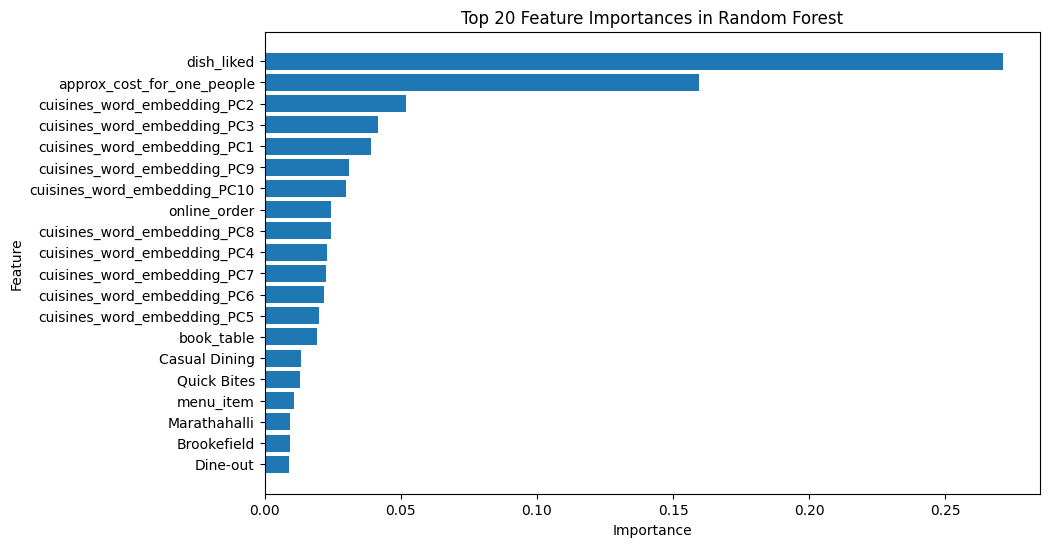

In [ ]:
import matplotlib.pyplot as plt

# Check if the best model has feature importance attribute
if hasattr(models[best_model_name], 'feature_importances_'):
    best_model = models[best_model_name]
    # Get feature importances
    feature_importances = best_model.feature_importances_
    # Create a DataFrame to organize and sort them
    feature_importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Select top 20 features
    top_20_features = feature_importance_df.head(20)

    # Plot top 20 feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(top_20_features['Feature'], top_20_features['Importance'])
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Top 20 Feature Importances in {best_model_name}')
    plt.gca().invert_yaxis()
    plt.show()
else:
    print(f"The selected model, {best_model_name}, does not support feature importance.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming the RandomForestRegressor model is already trained and named `rf_model`
# and that `scaler` is used for standardizing numeric features

# Load the new dataset
new_data = pd.read_csv("/content/neated_ratings_need_mark_final11 (1).csv")  # Replace with your file path

# Select the same features as used during model training
new_data_selected = new_data[lasso_selected_features_list]



# Predict the ratings using the trained Random Forest model
predicted_ratings = models['Random Forest'].predict(new_data_selected)

# Add the predicted ratings as a new column in the original new_data DataFrame
new_data['predicted_rate'] = predicted_ratings

# Save the updated DataFrame with the predictions to a CSV file
new_data.to_csv("new_data_with_predictions.csv", index=False)

print("Predicted rates have been added to the dataset and saved as 'new_data_with_predictions.csv'")


<ipython-input-9-fdd4f6a0f588>:9: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv("/content/neated_ratings_need_mark_final11 (1).csv")  # Replace with your file path


Predicted rates have been added to the dataset and saved as 'new_data_with_predictions.csv'


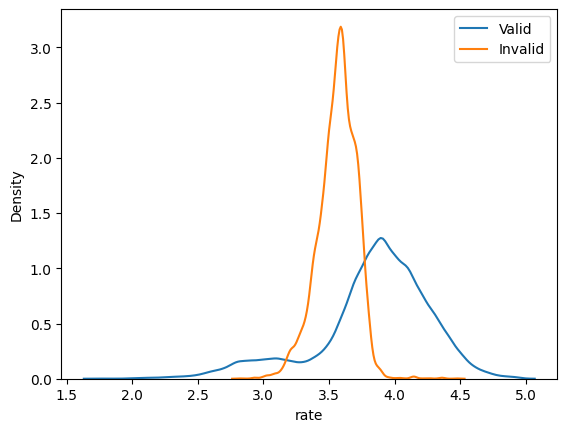

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

# Assuming you have two datasets with the same structure
data1 = pd.read_csv('/content/task1_negative_raw_with_results.csv')
data2 = pd.read_csv('/content/task1_training_raw_attributes.csv')

group1 = data2['rate']
group2 = data1['predicted_rate']

f_oneway(group1, group2)
sns.kdeplot(group1, label='Valid')
sns.kdeplot(group2, label='Invalid')
plt.legend()
plt.show()